In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

In [2]:

s = sp.Symbol("s")
def series(*zs: list[sp.Expr]) -> sp.Expr:
    """Return the series of the given list of expressions."""
    return sum(zs)


def shunt(*zs: list[sp.Expr]) -> sp.Expr:
    """Return the shunt of the given list of expressions."""
    return 1 / series(*[1 / z for z in zs])

def create_lc_tf(line_len: int) -> sp.Expr:
    cap_vars = [sp.Symbol(f"c_{i}") for i in range(line_len + 1)]
    ind_vars = [sp.Symbol(f"l_{i}") for i in range(line_len)]

    caps = [1 / (s * cap_vars[i]) for i in range(line_len + 1)]
    inds = [s * ind_vars[i] for i in range(line_len)]


    def lc_series_impedance(loc: int, depth: int) -> sp.Expr:
        """Return the series of LC components."""
        if loc == depth:
            return series(caps[loc], inds[loc - 1])
        elif loc == 0:
            return shunt(caps[0], lc_series_impedance(1, line_len))
        else:
            return series(
                inds[loc - 1],
                shunt(caps[loc], lc_series_impedance(loc + 1, depth)),
            )

    return lc_series_impedance(0, line_len), cap_vars, ind_vars

c_1*c_2*c_3*c_4*l_0*l_1*l_2*l_3*s**8 + s**6*(c_1*c_2*c_3*l_0*l_1*l_2 + c_1*c_2*c_4*l_0*l_1*l_2 + c_1*c_2*c_4*l_0*l_1*l_3 + c_1*c_3*c_4*l_0*l_1*l_3 + c_1*c_3*c_4*l_0*l_2*l_3 + c_2*c_3*c_4*l_0*l_2*l_3 + c_2*c_3*c_4*l_1*l_2*l_3) + s**4*(c_1*c_2*l_0*l_1 + c_1*c_3*l_0*l_1 + c_1*c_3*l_0*l_2 + c_1*c_4*l_0*l_1 + c_1*c_4*l_0*l_2 + c_1*c_4*l_0*l_3 + c_2*c_3*l_0*l_2 + c_2*c_3*l_1*l_2 + c_2*c_4*l_0*l_2 + c_2*c_4*l_0*l_3 + c_2*c_4*l_1*l_2 + c_2*c_4*l_1*l_3 + c_3*c_4*l_0*l_3 + c_3*c_4*l_1*l_3 + c_3*c_4*l_2*l_3) + s**2*(c_1*l_0 + c_2*l_0 + c_2*l_1 + c_3*l_0 + c_3*l_1 + c_3*l_2 + c_4*l_0 + c_4*l_1 + c_4*l_2 + c_4*l_3) + 1

c_0*c_1*c_2*c_3*c_4*l_0*l_1*l_2*l_3*s**9 + s**7*(c_0*c_1*c_2*c_3*l_0*l_1*l_2 + c_0*c_1*c_2*c_4*l_0*l_1*l_2 + c_0*c_1*c_2*c_4*l_0*l_1*l_3 + c_0*c_1*c_3*c_4*l_0*l_1*l_3 + c_0*c_1*c_3*c_4*l_0*l_2*l_3 + c_0*c_2*c_3*c_4*l_0*l_2*l_3 + c_0*c_2*c_3*c_4*l_1*l_2*l_3 + c_1*c_2*c_3*c_4*l_1*l_2*l_3) + s**5*(c_0*c_1*c_2*l_0*l_1 + c_0*c_1*c_3*l_0*l_1 + c_0*c_1*c_3*l_0*l_2 + c_0*c_1*c_4*l_0*l_1 + c_0*c_1*c_4*l_0*l_2 + c_0*c_1*c_4*l_0*l_3 + c_0*c_2*c_3*l_0*l_2 + c_0*c_2*c_3*l_1*l_2 + c_0*c_2*c_4*l_0*l_2 + c_0*c_2*c_4*l_0*l_3 + c_0*c_2*c_4*l_1*l_2 + c_0*c_2*c_4*l_1*l_3 + c_0*c_3*c_4*l_0*l_3 + c_0*c_3*c_4*l_1*l_3 + c_0*c_3*c_4*l_2*l_3 + c_1*c_2*c_3*l_1*l_2 + c_1*c_2*c_4*l_1*l_2 + c_1*c_2*c_4*l_1*l_3 + c_1*c_3*c_4*l_1*l_3 + c_1*c_3*c_4*l_2*l_3 + c_2*c_3*c_4*l_2*l_3) + s**3*(c_0*c_1*l_0 + c_0*c_2*l_0 + c_0*c_2*l_1 + c_0*c_3*l_0 + c_0*c_3*l_1 + c_0*c_3*l_2 + c_0*c_4*l_0 + c_0*c_4*l_1 + c_0*c_4*l_2 + c_0*c_4*l_3 + c_1*c_2*l_1 + c_1*c_3*l_1 + c_1*c_3*l_2 + c_1*c_4*l_1 + c_1*c_4*l_2 + c_1*c_4*l_3 + c_2*c_3*l_2

(s**8 + 7*s**6 + 15*s**4 + 10*s**2 + 1)/(s*(s**8 + 8*s**6 + 21*s**4 + 20*s**2 + 5))

20.4232037045793*s*(0.0464301578265443*s**8 + 0.377441945287539*s**6 + 1.0*s**4 + 0.954148578565564*s**2 + 0.236809085805443)

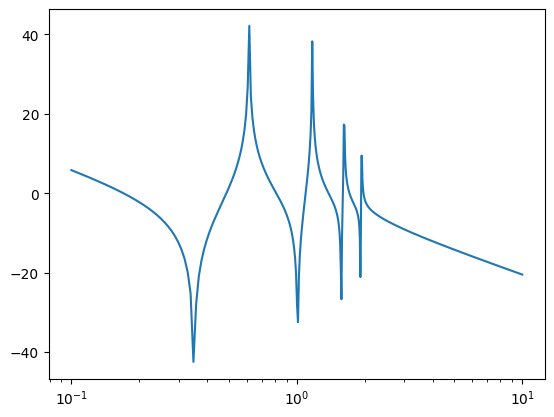

In [3]:

for lc_val in [1]:
    i = 4
    lci, cap_vars, ind_vars = create_lc_tf(i)

    # Replace all caps and inds with 1

    # Express the impedance with a numerator and a denominator
    num, den = sp.cancel(lci, s).as_numer_denom()
    display(num)
    display(den)
    vars = {var: lc_val * np.random.normal(1, 0.1) for var in cap_vars + ind_vars}
    num_subs = num.subs(vars)
    den_subs = den.subs(vars)
    display(sp.simplify(lci.subs({var: lc_val for var in cap_vars + ind_vars})))
    num_coeffs = sp.poly(num_subs).all_coeffs()
    den_coeffs = sp.poly(den_subs).all_coeffs()

    display(sp.factor(den_subs))

    num_coeffs = [float(v) for v in num_coeffs]
    den_coeffs = [float(v) for v in den_coeffs]

    tf = signal.TransferFunction(num_coeffs, den_coeffs)

    # plot the bode plot
    w = np.linspace(1e-1, 10, 1000) / lc_val
    w, mag, phase = signal.bode(tf, w=w)
    plt.figure()
    plt.semilogx(w, mag)
    # plt.figure()
    # plt.semilogx(w, phase)
    plt.show()

    # Plot the pole-zero plot
    # plt.figure()
    # plt.plot(tf.zeros.real, tf.zeros.imag, "o")
    # plt.plot(tf.poles.real, tf.poles.imag, "x")
    # plt.show()



In [4]:
def sspuf_A_matrix(n_bit: int, line_len: int):
    """Generate A matrix for SSPUF symbolic model.

    Args:
        n_bit (int): number of bits
        line_len (int): length of line

    Returns:
        Matrix: A matrix
    """
    cc = sp.var('C_c')
    cap, ind = [[None for _ in range(line_len)] for _ in range(n_bit)], [[None for _ in range(line_len)] for _ in range(n_bit)]
    gm_c = [[[None for _ in range(2)] for _ in range(line_len)] for _ in range(n_bit)]
    gm_l = [[[None for _ in range(2)] for _ in range(line_len)] for _ in range(n_bit)]
    sw_bits = [None for _ in range(n_bit)]

    for i in range(n_bit):
        for j in range(line_len):
            cap[i][j] = sp.var(f'C_{i}_{j}')
            ind[i][j] = sp.var(f'L_{i}_{j}')
            gm_c[i][j][0] = sp.var(f'g_C_{i}_{j}_0')
            gm_c[i][j][1] = sp.var(f'g_C_{i}_{j}_1')
            gm_l[i][j][0] = sp.var(f'g_L_{i}_{j}_0')
            gm_l[i][j][1] = sp.var(f'g_L_{i}_{j}_1')
            sw_bits[i] = sp.var(f'b_{i}')
    

    sub_mat_len = 2 * line_len
    def ith_diag_sub_mat(i: int):
        a_i = sp.zeros(sub_mat_len, sub_mat_len)
        for j in range(sub_mat_len - 1):
            if j % 2 == 0:
                c_idx = j // 2
                a_i[j, j + 1] = - gm_c[i][c_idx][1]
                a_i[j + 1, j] = gm_c[i][c_idx][0]
            else:
                l_idx = j // 2 + 1
                a_i[j, j + 1] = - gm_l[i][l_idx][1]
                a_i[j + 1, j] = gm_l[i][l_idx][0]
        return a_i
    
    ai_row_mats = [ith_diag_sub_mat(i) for i in range(n_bit)]
    for i, diag_mat in enumerate(ai_row_mats):
        left_zeros = sp.zeros(sub_mat_len, sub_mat_len * i)
        right_zeros = sp.zeros(sub_mat_len, sub_mat_len * (n_bit - i - 1))
        ai_row_mats[i] = left_zeros.row_join(diag_mat).row_join(right_zeros)
    

    mid_to_branch_row = sp.zeros(1, sub_mat_len * n_bit)
    mid_to_branch_col = sp.zeros(sub_mat_len * n_bit, 1)
    for i in range(n_bit):
        mid_to_branch_row[0, i * sub_mat_len] = -sw_bits[i] * gm_l[i][0][1]
        mid_to_branch_col[i * sub_mat_len, 0] = sw_bits[i] * gm_c[i][0][0]
    
    A_1_to_n = mid_to_branch_row
    for ai_row_mat in ai_row_mats:
        A_1_to_n = A_1_to_n.col_join(ai_row_mat)
    

    A_mat = sp.zeros(1, 1).col_join(mid_to_branch_col).row_join(A_1_to_n)

    LC_mat = sp.zeros(A_mat.shape[0], A_mat.shape[1])
    LC_mat[0, 0] = 1/cc
    for i in range(n_bit):
        for j in range(line_len):
            idx = 1 + i * sub_mat_len + 2 * j
            LC_mat[idx, idx] = 1/ind[i][j]
            LC_mat[idx + 1, idx + 1] = 1/cap[i][j]

    return LC_mat * A_mat, cc, cap, ind, gm_c, gm_l, sw_bits


n_bit, line_len = 1, 4
A_mat, cc, cap, ind, gm_c, gm_l, sw_bits = sspuf_A_matrix(n_bit, line_len)
B_mat, C_mat, D_mat = sp.zeros(A_mat.shape[0], 1), sp.zeros(1, A_mat.shape[0]), sp.zeros(1, 1)
B_mat[0, 0] = 1/cc
C_mat[0, 0] = 1

display(A_mat)
display(B_mat)
display(C_mat)
display(D_mat)

Matrix([
[                  0, -b_0*g_L_0_0_1/C_c,                0,                0,                0,                0,                0,                0,                0],
[b_0*g_C_0_0_0/L_0_0,                  0, -g_C_0_0_1/L_0_0,                0,                0,                0,                0,                0,                0],
[                  0,    g_C_0_0_0/C_0_0,                0, -g_L_0_1_1/C_0_0,                0,                0,                0,                0,                0],
[                  0,                  0,  g_L_0_1_0/L_0_1,                0, -g_C_0_1_1/L_0_1,                0,                0,                0,                0],
[                  0,                  0,                0,  g_C_0_1_0/C_0_1,                0, -g_L_0_2_1/C_0_1,                0,                0,                0],
[                  0,                  0,                0,                0,  g_L_0_2_0/L_0_2,                0, -g_C_0_2_1/L_0_2,               

Matrix([
[1/C_c],
[    0],
[    0],
[    0],
[    0],
[    0],
[    0],
[    0],
[    0]])

Matrix([[1, 0, 0, 0, 0, 0, 0, 0, 0]])

Matrix([[0]])

/home/wyn/miniconda3/envs/ark/lib/python3.11/site-packages/scipy/signal/_filter_design.py:1112: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  b, a = normalize(b, a)


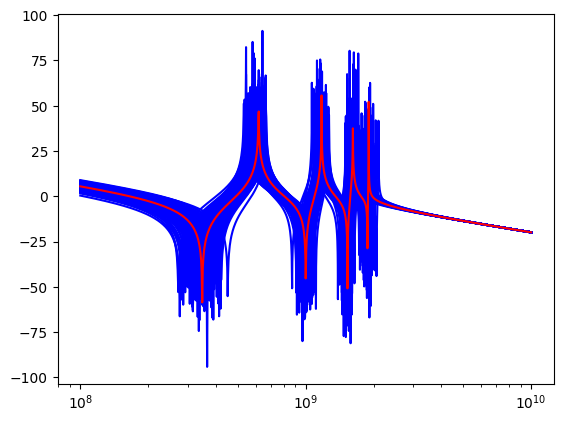

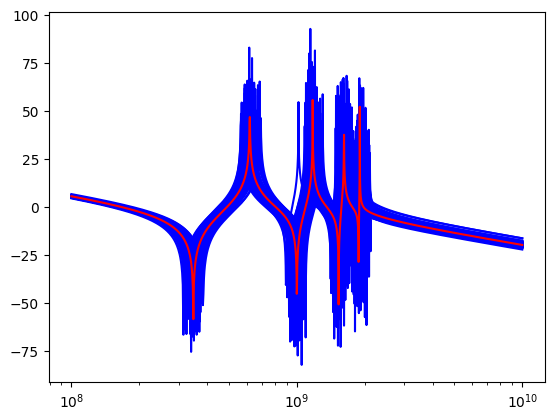

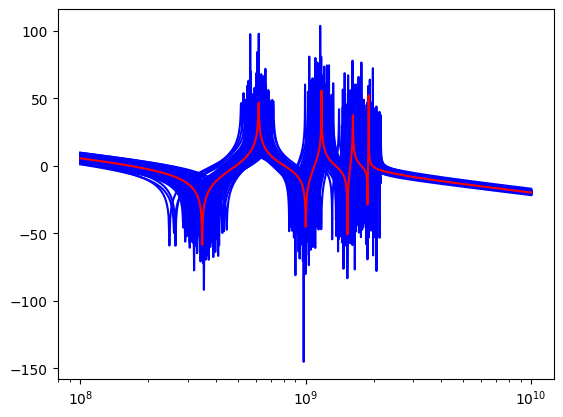

In [5]:
lc_val = 1e-9
def flatten_list(x):
    while isinstance(x[0], list):
        x = sum(x, [])
    return x
cap_flat = flatten_list(cap)
ind_flat = flatten_list(ind)
gm_c_flat = flatten_list(gm_c)
gm_l_flat = flatten_list(gm_l)
switch_flat = flatten_list(sw_bits)

# plot the bode plot
w = np.linspace(1e-1, 10, 5000) / lc_val

plt.figure()

# Plot mismatch
n_mismatch = 100
for mm_lc, mm_gm in [(False, True), (True, False), (True, True)]:
    for i in range(n_mismatch + 1):
        if i == n_mismatch:
            gm_sub = {gm: 1 for gm in gm_c_flat + gm_l_flat}
            lc_sub = {element: lc_val for element in cap_flat + ind_flat}
            switch_sub = {element: 1 for element in switch_flat}
            nominal_val = gm_sub | lc_sub | {cc: lc_val} | switch_sub
            color = 'red'
        else:
            gm_sub = {gm: np.random.normal(1, 0.1) if mm_gm else 1 for gm in gm_c_flat + gm_l_flat}
            lc_sub = {element: np.random.normal(1, 0.1) * lc_val if mm_lc else lc_val for element in cap_flat + ind_flat}
            switch_sub = {element: 1 for element in switch_flat}
            nominal_val = gm_sub | lc_sub | {cc: np.random.normal(1, 0.1) * lc_val if mm_lc else lc_val} | switch_sub
            color = 'blue'

        A_mat_nominal = np.array(A_mat.subs(nominal_val)).astype(np.float64)
        B_mat_nominal = np.array(B_mat.subs(nominal_val)).astype(np.float64)
        C_mat_nominal = np.array(C_mat.subs(nominal_val)).astype(np.float64)
        D_mat_nominal = np.array(D_mat.subs(nominal_val)).astype(np.float64)


        ss = signal.StateSpace(A_mat_nominal, B_mat_nominal, C_mat_nominal, D_mat_nominal)
        w, mag, phase = signal.bode(ss, w=w)
        plt.semilogx(w, mag, color=color)
    # plt.ylim(100, -100)
    plt.savefig(f"mismatch_lc_{mm_lc}_gm_{mm_gm}.png", dpi=150, bbox_inches='tight')
    plt.show()